## Process PGE Data, Merge into a Single Table, and Basic EDA

### Preview of 2020-Q1

In [1]:
import pandas as pd 
import numpy as np

In [2]:
preview = pd.read_csv('PGE_2020-2024_Data\PGE_2020_Q1_ElectricUsageByZip.csv')
preview.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lydia\AppData\Local\Temp\ipykernel_24232\3322186260.py:1: SyntaxWarning: invalid escape sequence '\P'
  preview = pd.read_csv('PGE_2020-2024_Data\PGE_2020_Q1_ElectricUsageByZip.csv')


,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
0,93101,1,2020,Elec- Agricultural,Y,0,0,NaN
1,93101,2,2020,Elec- Agricultural,Y,0,0,NaN
2,93101,3,2020,Elec- Agricultural,Y,0,0,NaN
3,93110,1,2020,Elec- Agricultural,Y,0,0,NaN
4,93110,2,2020,Elec- Agricultural,Y,0,0,NaN


In [3]:
preview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZIPCODE         7865 non-null   int64 
 1   MONTH           7865 non-null   int64 
 2   YEAR            7865 non-null   int64 
 3   CUSTOMERCLASS   7865 non-null   object
 4   COMBINED        7865 non-null   object
 5   TOTALCUSTOMERS  7865 non-null   object
 6   TOTALKWH        7865 non-null   object
 7   AVERAGEKWH      3508 non-null   object
dtypes: int64(3), object(5)
memory usage: 491.7+ KB


In [4]:
len(preview.AVERAGEKWH)

7865

### Merge files - Run only ONCE

In [5]:
# # Prepare file names 
# quarters = ['Q1', 'Q2', 'Q3', 'Q4']
# filenames = [f'PGE_{year}_{q}_ElectricUsageByZip.csv' for year in range(2020, 2025) for q in quarters]
# folder_paths = "PGE_2020-2024_Data"

# import os
# # Combine all valid files
# combined_df = pd.DataFrame()

# for fname in filenames:
#     full_path = os.path.join(folder_paths, fname)
#     if os.path.isfile(full_path):
#         df = pd.read_csv(full_path)
#         combined_df = pd.concat([combined_df, df], ignore_index=True)
#     else:
#         print(f'⚠️ File not found: {fname}, skipping.')

# # Save the combined file
# output_path = os.path.join(folder_paths, 'PGE_Combined_2020_2024.csv')
# combined_df.to_csv(output_path, index=False)
# print(f'✅ Combined file saved to: {output_path}')

In [6]:
# Import the newly combined file
pge = pd.read_csv('PGE_2020-2024_Data\PGE_Combined_2020_2024.csv')
pge.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lydia\AppData\Local\Temp\ipykernel_24232\245668876.py:2: SyntaxWarning: invalid escape sequence '\P'
  pge = pd.read_csv('PGE_2020-2024_Data\PGE_Combined_2020_2024.csv')


,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
0,93101,1,2020,Elec- Agricultural,Y,0,0,NaN
1,93101,2,2020,Elec- Agricultural,Y,0,0,NaN
2,93101,3,2020,Elec- Agricultural,Y,0,0,NaN
3,93110,1,2020,Elec- Agricultural,Y,0,0,NaN
4,93110,2,2020,Elec- Agricultural,Y,0,0,NaN


In [7]:
pge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151950 entries, 0 to 151949
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ZIPCODE         151950 non-null  int64 
 1   MONTH           151950 non-null  int64 
 2   YEAR            151950 non-null  int64 
 3   CUSTOMERCLASS   151950 non-null  object
 4   COMBINED        151950 non-null  object
 5   TOTALCUSTOMERS  151950 non-null  object
 6   TOTALKWH        151950 non-null  object
 7   AVERAGEKWH      66100 non-null   object
dtypes: int64(3), object(5)
memory usage: 9.3+ MB


In [8]:
# Look at CUSTOMERCLASS
pge.CUSTOMERCLASS.unique()

array(['Elec- Agricultural', 'Elec- Commercial', 'Elec- Industrial',
       'Elec- Residential'], dtype=object)

In [9]:
# Look at COMBINED
# Accordingly, the public datasets meet Commission Decision rules\
# for public aggregation of data, as follows: a minimum of 100 Residential customers; a minimum of 15 \
# Non-Residential customers, with no single Non-Residential customer accounting for more than 15% of \
# the total consumption. If aggregation is not met, the consumption will be combined with a neighboring \
# ZIP code until the aggregation requirements are met.

pge.COMBINED.unique()

array(['Y', 'N'], dtype=object)

In [10]:
# Look at TOTALCUSTOMERS
pge.TOTALCUSTOMERS.unique()

array(['0', '259', '349', ..., '6,033', '6,289', '11,455'], dtype=object)

In [11]:
# Look at TOTALKWH
pge.TOTALKWH.unique()

array(['0', '14,046,480', '21,871,997', ..., '885,597', '1,002,262',
       '1,047,577'], dtype=object)

In [12]:
# Look at AVERAGEKWH
pge.AVERAGEKWH.unique()

array([nan, '54,234', '62,670', ..., '424,562', '387,123', '116'],
      dtype=object)

### Data Cleaning

In [13]:
# Convert the TOTALCUSTOMERS into int
pge['TOTALCUSTOMERS'] = (
    pge['TOTALCUSTOMERS']
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
    .astype('Int64')
)
pge.TOTALCUSTOMERS.unique()

<IntegerArray>
[    0,   259,   349,   108,   109,   115,  1555,   153,   244,   237,
 ...
 10183,  5894, 15176, 15166, 14395, 12237,  6038,  6033,  6289, 11455]
Length: 15187, dtype: Int64

In [15]:
# Convert COMBINED into string
pge['COMBINED'] = pge['COMBINED'].astype(str)
pge.COMBINED.unique()

array(['Y', 'N'], dtype=object)

In [16]:
# Convert the TOTALKWH into int
pge['TOTALKWH'] = (
    pge['TOTALKWH']
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
    .astype('Int64')
)
pge.TOTALKWH.unique()

<IntegerArray>
[       0, 14046480, 21871997,  2732693,  2892721,  1765301, 48369146,
  2009885,  3427278,  9211689,
 ...
   138965,   161580,   264640,   305148,   330838,   112371,   115775,
   885597,  1002262,  1047577]
Length: 65624, dtype: Int64

In [17]:
pge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151950 entries, 0 to 151949
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ZIPCODE         151950 non-null  int64 
 1   MONTH           151950 non-null  int64 
 2   YEAR            151950 non-null  int64 
 3   CUSTOMERCLASS   151950 non-null  object
 4   COMBINED        151950 non-null  object
 5   TOTALCUSTOMERS  151950 non-null  Int64 
 6   TOTALKWH        151950 non-null  Int64 
 7   AVERAGEKWH      66100 non-null   object
dtypes: Int64(2), int64(3), object(3)
memory usage: 9.6+ MB


### Trends of total kwh

C:\Users\Lydia\AppData\Local\Temp\ipykernel_24232\2396785270.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ZIPCODE', bbox_to_anchor=(1.05, 1), loc='upper left')


<Figure size 1400x700 with 0 Axes>

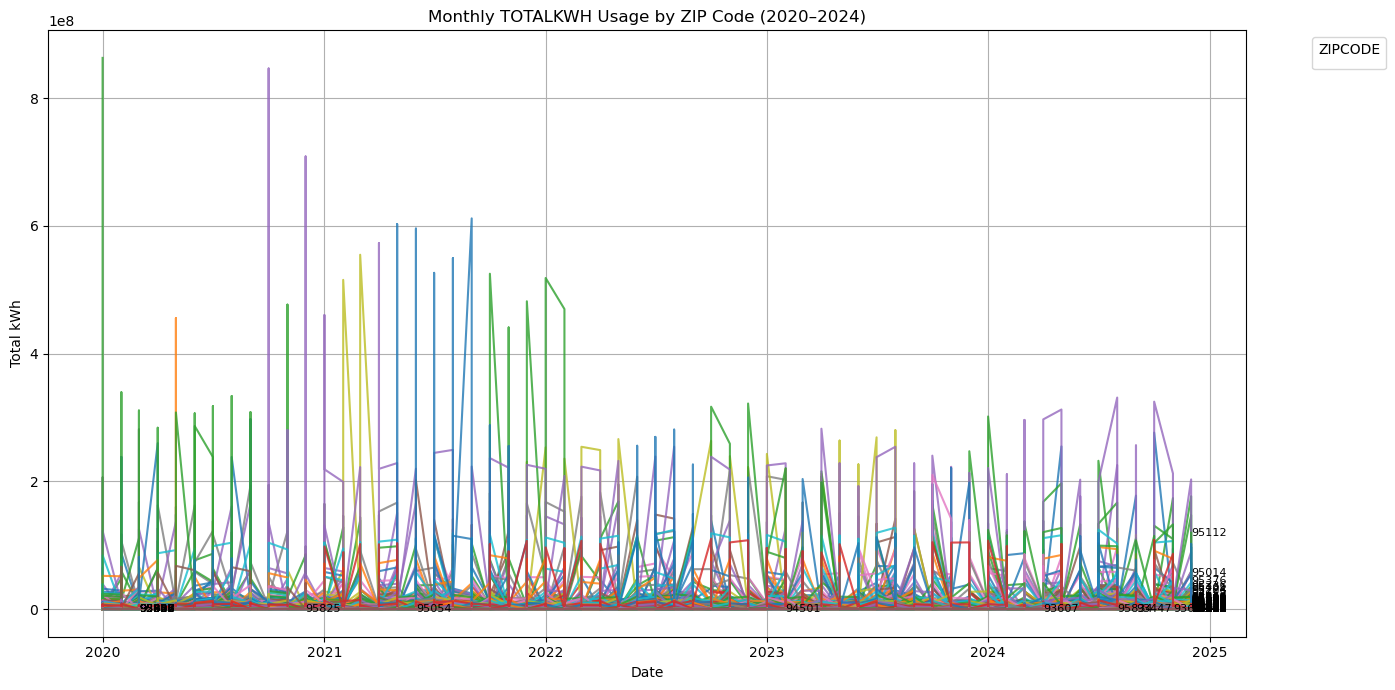

In [26]:
# Create a date time column
pge['DATE'] = pd.to_datetime(pge[['YEAR', 'MONTH']].assign(DAY=1))
pge = pge.sort_values('DATE')

# Plot the change in total kwh by month by zip code 
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Start the plot
plt.figure(figsize=(14, 7))

# Plot and label each ZIP line
for zip_code, group in pge.groupby('ZIPCODE'):
    plt.plot(group['DATE'], group['TOTALKWH'], alpha=0.8)
    
    # Add label at the last point
    last_point = group.iloc[-1]
    plt.text(
        last_point['DATE'], 
        last_point['TOTALKWH'], 
        str(zip_code),
        fontsize=8,
        va='center',
        ha='left'
    )

plt.title('Monthly TOTALKWH Usage by ZIP Code (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Total kWh')
plt.legend(title='ZIPCODE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

The graph looks too crowded, let's use a smoothed trendlines that calculate a 12-month rolling average for each zip code

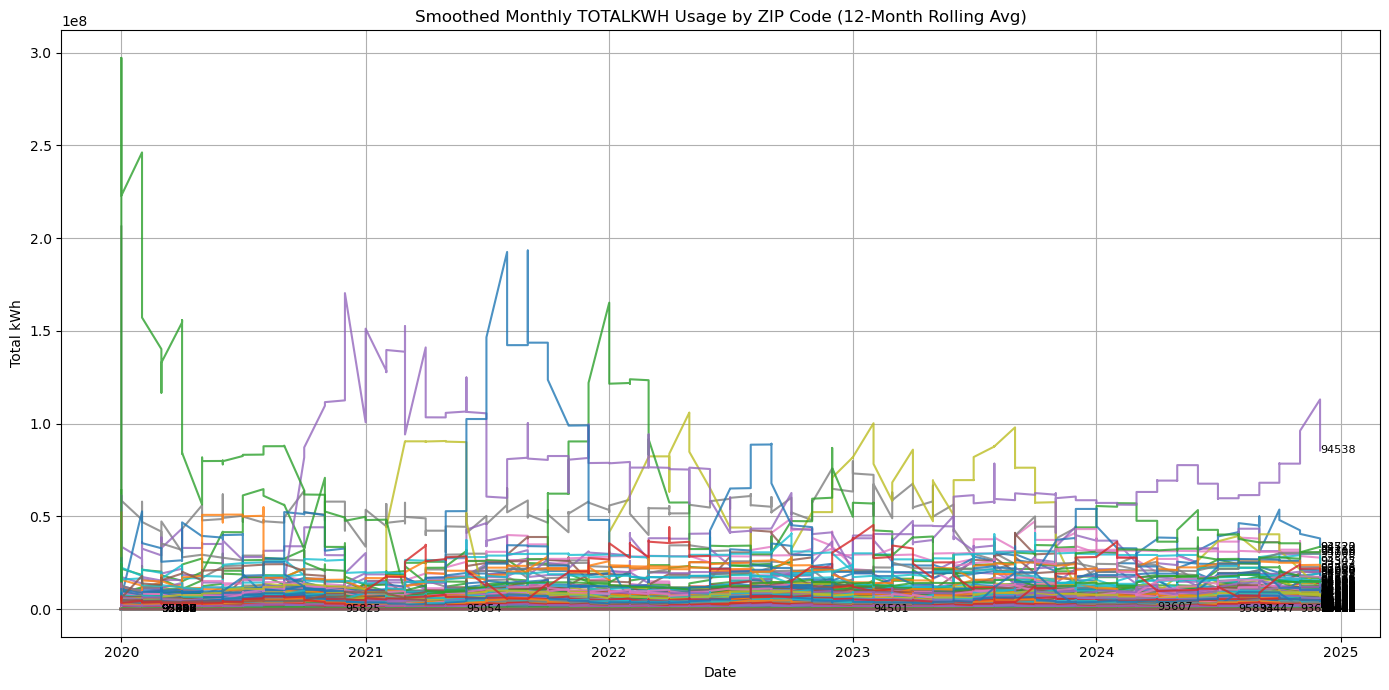

In [ ]:
# Compute 12-month rolling average for TOTALKWH per ZIP
pge['TOTALKWH_ROLLING'] = pge.groupby('ZIPCODE')['TOTALKWH'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot
plt.figure(figsize=(14, 7))

# Plot and label each ZIP line
for zip_code, group in pge.groupby('ZIPCODE'):
    plt.plot(group['DATE'], group['TOTALKWH_ROLLING'], alpha=0.8)
    
    # Add label at the last point
    last_point = group.iloc[-1]
    plt.text(
        last_point['DATE'], 
        last_point['TOTALKWH_ROLLING'], 
        str(zip_code),
        fontsize=8,
        va='center',
        ha='left'
    )

plt.title('Smoothed Monthly TOTALKWH Usage by ZIP Code (12-Month Rolling Avg)')
plt.xlabel('Date')
plt.ylabel('Total kWh')
plt.grid(True)
plt.tight_layout()
# No legend
plt.show()

### Filter out the NAN in AVERAGEKWH and perform EDA on this column

In [23]:
pge_filter = pge[pge['AVERAGEKWH'].notna()]
pge_filter.AVERAGEKWH.unique()


array(['5,785', '4,997', '2,694', ..., '8,434', '558,930', '403,470'],
      dtype=object)

In [24]:
# Convert into int
pge_filter['AVERAGEKWH'] = (
    pge_filter['AVERAGEKWH']
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
    .astype('Int64')
)

C:\Users\Lydia\AppData\Local\Temp\ipykernel_24232\3011409990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pge_filter['AVERAGEKWH'] = (


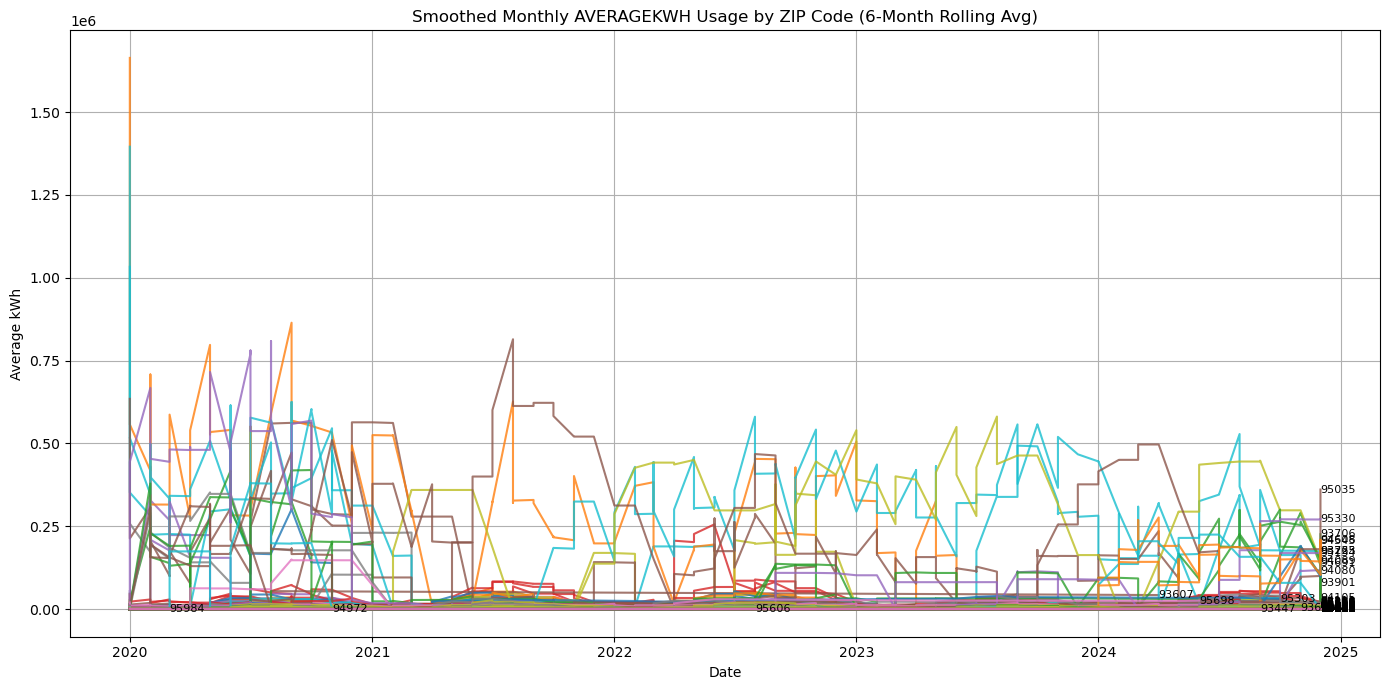

In [27]:
# Compute 6-month rolling average for AVERAGEKWH per ZIP
pge_filter['AVERAGEKWH_ROLLING'] = pge_filter.groupby('ZIPCODE')['AVERAGEKWH'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())

# Plot
plt.figure(figsize=(14, 7))

# Plot and label each ZIP line
for zip_code, group in pge_filter.groupby('ZIPCODE'):
    plt.plot(group['DATE'], group['AVERAGEKWH_ROLLING'], alpha=0.8)
    
    # Add label at the last point
    last_point = group.iloc[-1]
    plt.text(
        last_point['DATE'], 
        last_point['AVERAGEKWH_ROLLING'], 
        str(zip_code),
        fontsize=8,
        va='center',
        ha='left'
    )

plt.title('Smoothed Monthly AVERAGEKWH Usage by ZIP Code (6-Month Rolling Avg)')
plt.xlabel('Date')
plt.ylabel('Average kWh')
plt.grid(True)
plt.tight_layout()
# No legend
plt.show()